# Example 4 - Data Viz with 3D Charts

## Minimize $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

Minimize $$f(x,y)= \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
import math
%matplotlib inline

In [2]:
def f(x,y):
    k = x**2+y**2
    r = 3**(-1*k)
    return 1/(r+1)

In [3]:
x = np.linspace(start=-2, stop=2, num=200)
y = np.linspace(start=-2, stop=2, num=200)

x_2d,y_2d = np.meshgrid(x,y)

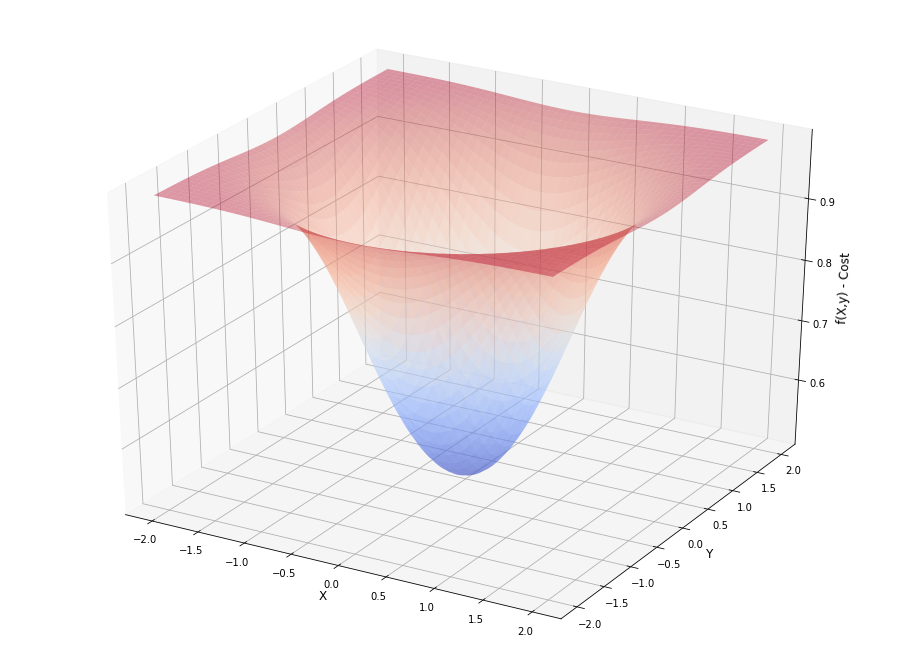

In [4]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=12)
ax.set_ylabel('Y',fontsize=12)
ax.set_zlabel('f(X,y) - Cost',fontsize=12)

ax.plot_surface(x_2d,y_2d,f(x_2d,y_2d),cmap=cm.coolwarm,alpha = 0.4)
plt.show()

# Partial Derivatives and Symbolic Computation

In [5]:
a,b=symbols('x,y')
print('Our Cost Function f(X,y) is:',f(a,b))
print('Partial derivative wrt X is:',diff(f(a,b),a))
print('Value of f(X,y) is:',f(a,b).evalf(subs={a:1.8,b:1.0}))

Our Cost Function f(X,y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt X is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(X,y) is: 0.990604794032582


Challenge: Evaluate the value of slope wrt x at a = 1.8 and b = 1.0

In [6]:
print('Value of df(X,y) wrt x is:',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Value of df(X,y) wrt x is: 0.0368089716197505


## Batch Gradient Descent with SumPy

In [7]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0])

for n in range(max_iter):
    
    ## Calculating slope(gradient)
    
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    
    ## New coordinates
    
    params = params - multiplier*gradients
    
## Results
print('Values in gradient array:',gradients)
print('Minimum occurs at x value of:',params[0])
print('Minimum occurs at y value of:',params[1])
print('The cost is:',f(params[0],params[1]))

Values in gradient array: [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


# Partial Derivatives and Symbolic Computation

### $$\frac{\partial f}{\partial x} = \frac{2x\ln(3)\cdot3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$

### $$\frac{\partial f}{\partial y} = \frac{2y\ln(3)\cdot3^{-x^2-y^2}}{\left(3^{-x^2-y^2}+1\right)^2}$$

In [8]:
def fpx(x,y):
    r = -x**2-y**2
    k = 3**r
    t = math.log(3)
    return (2*x*t*k)/((k+1)**2)

In [9]:
fpx(1.8,1.0)

0.036808971619750504

In [10]:
def fpy(x,y):
    r = -x**2-y**2
    k = 3**r
    t = math.log(3)
    return (2*y*t*k)/((k+1)**2)

In [11]:
fpy(1.8,1.0)

0.020449428677639166

In [12]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0])

for n in range(max_iter):
    
    ## Calculating slope(gradient)
    
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    
    ## New coordinates
    
    params = params - multiplier*gradients
    
## Results
print('Values in gradient array:',gradients)
print('Minimum occurs at x value of:',params[0])
print('Minimum occurs at y value of:',params[1])
print('The cost is:',f(params[0],params[1]))

Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Descent and Advance Numpy Arrays

In [13]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0])
params_array = params.reshape(1,2)

for n in range(max_iter):
    
    ## Calculating slope(gradient)
    
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    
    ## New coordinates
    
    params = params - multiplier*gradients
    params_array = np.append(arr=params_array,values=params.reshape(1,2),axis=0)
    
## Results
print('Values in gradient array:',gradients)
print('Minimum occurs at x value of:',params[0])
print('Minimum occurs at y value of:',params[1])
print('The cost is:',f(params[0],params[1]))

Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


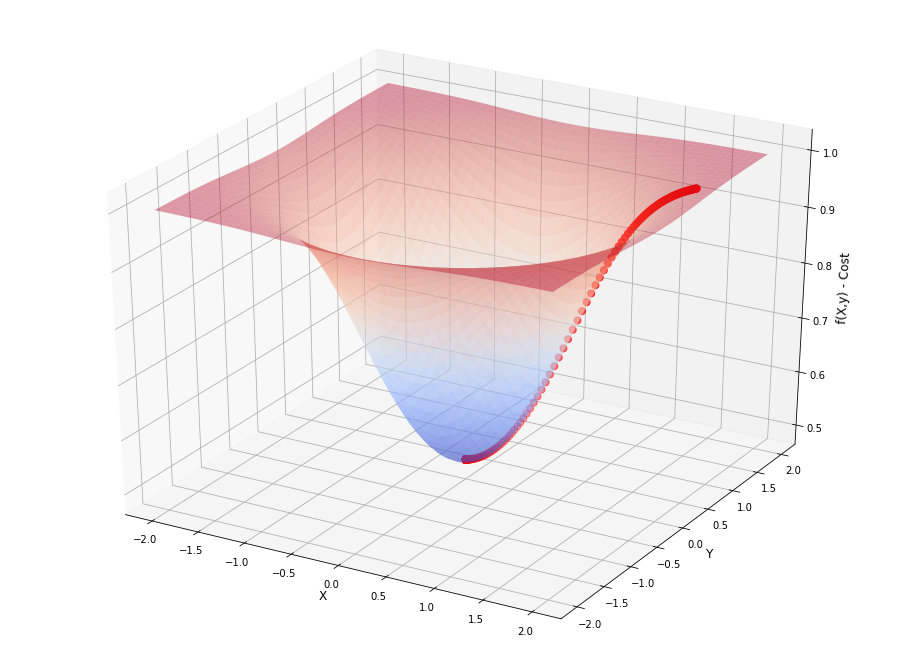

In [14]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=12)
ax.set_ylabel('Y',fontsize=12)
ax.set_zlabel('f(X,y) - Cost',fontsize=12)

ax.plot_surface(x_2d,y_2d,f(x_2d,y_2d),cmap=cm.coolwarm,alpha = 0.4)
ax.scatter(params_array[:,0],params_array[:,1],f(params_array[:,0],params_array[:,1]),s=50,color='red')
plt.show()